Data Preprocessing and data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imsave, imread, imresize

In [2]:
%matplotlib inline


In [3]:
np.random.seed(2)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [5]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [7]:
sns.set(style='white',context='notebook',palette = 'deep')

In [8]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [9]:
Y_train = train['label']

In [10]:
X_train = train.drop(labels = ['label'],axis = 1)

In [11]:
del train


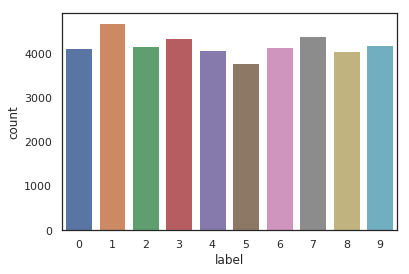

In [12]:
g = sns.countplot(Y_train)
# Y_train.value_counts()

In [13]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
X_train = X_train/255.0
test = test / 255.0

In [16]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [17]:
Y_train = to_categorical(Y_train,10)

In [18]:
random_seed = 2

In [19]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.1,random_state = random_seed)

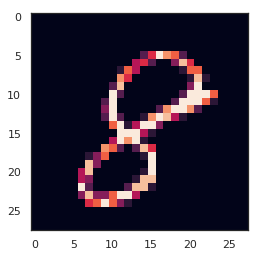

In [20]:
g = plt.imshow(X_train[0][:,:,0])

Setting CNN model

In [21]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [22]:
optimizer = RMSprop(lr = 0.001,rho = 0.9,epsilon = 1e-08,decay=0.0)

In [23]:
model.compile(optimizer = optimizer ,loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [24]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor = "val_acc",
    verbose = 1,
    factor = 0.5,
    min_lr = 0.00001
)

In [25]:
epochs = 30
batch_size = 86

In [26]:
history = model.fit(
    X_train,
    Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val,Y_val),
    verbose = 2
)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 8s - loss: 0.2374 - acc: 0.9246 - val_loss: 0.0613 - val_acc: 0.9805
Epoch 2/30
 - 5s - loss: 0.0735 - acc: 0.9773 - val_loss: 0.0615 - val_acc: 0.9814
Epoch 3/30
 - 5s - loss: 0.0538 - acc: 0.9836 - val_loss: 0.0448 - val_acc: 0.9883
Epoch 4/30
 - 5s - loss: 0.0472 - acc: 0.9865 - val_loss: 0.0355 - val_acc: 0.9895
Epoch 5/30
 - 5s - loss: 0.0404 - acc: 0.9877 - val_loss: 0.0314 - val_acc: 0.9902
Epoch 6/30
 - 5s - loss: 0.0360 - acc: 0.9891 - val_loss: 0.0270 - val_acc: 0.9929
Epoch 7/30
 - 5s - loss: 0.0339 - acc: 0.9904 - val_loss: 0.0299 - val_acc: 0.9910
Epoch 8/30
 - 5s - loss: 0.0318 - acc: 0.9905 - val_loss: 0.0318 - val_acc: 0.9919
Epoch 9/30
 - 5s - loss: 0.0292 - acc: 0.9907 - val_loss: 0.0300 - val_acc: 0.9914
Epoch 10/30
 - 5s - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0282 - val_acc: 0.9936
Epoch 11/30
 - 5s - loss: 0.0285 - acc: 0.9913 - val_loss: 0.0320 - val_acc: 0.9912
Epoch 12/30
 - 5s - loss: 0.0284 - a

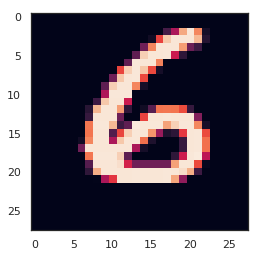

In [27]:
g = plt.imshow(X_val[0][:,:,0])

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

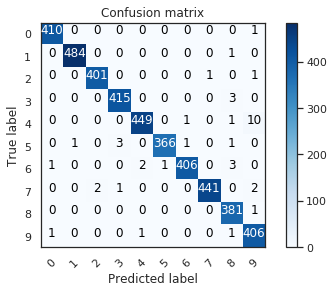

In [29]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [30]:
results = model.predict(X_val)
results = np.argmax(results,axis =1)
results = pd.Series(results,name="Label")
print(results[0])

6


In [32]:
x = imread("output.png",mode = "L")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [33]:
x = np.invert(x)

In [34]:
x = imresize(x,(28,28))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [35]:
x = x.reshape(1,28,28,1)

In [36]:
results = model.predict(x)


In [37]:
results = np.argmax(results,axis =1)
results = pd.Series(results,name="Label")
print(results[0])

7


In [38]:
model.save("first_try.h5")